In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

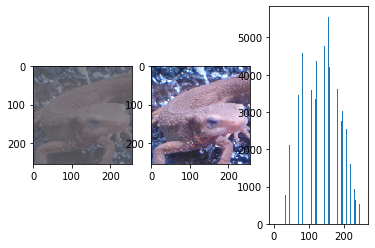

In [15]:
#21
def hist_normal(_img, a=0, b=255):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    c = np.min(img)
    d = np.max(img)
    
    out = (b - a) / (d - c) * (img - c) + a
    out = np.clip(out, a, b)
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_normal(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

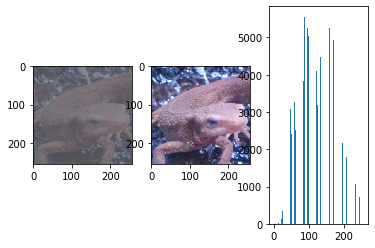

In [22]:
#22
def hist_mani(img, m0=128, s0=52):
    img = img.astype(np.float)
    out = np.zeros_like(img)
    m = np.mean(img)
    s = np.std(img)
    
    out = s0 / s * (img - m) + m0
    out = out.astype(np.uint8)
    return out

    
img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_mani(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

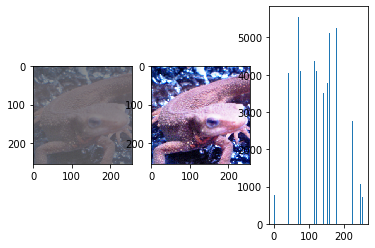

In [28]:
#23
def hist_equal(_img, z_max=255):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    h, w, c = img.shape
    s = h * w * c
    
    sum = 0
    for i in range(0, 255):
        idx = np.where(img == i)
        sum += len(img[idx])
        z = z_max / s * sum
        out[idx] = z
    
    out = out.astype(np.uint8)
    return out

    
img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_equal(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

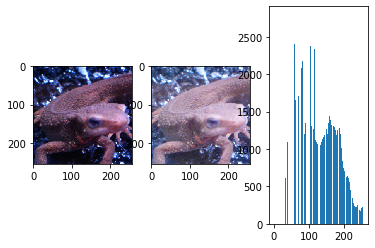

In [33]:
#24
def gamma_correction(_img, c=1, g=2.2):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    
    img /= 255
    out = (img / c)**(1/g)
    out *= 255
    
    out = out.astype(np.uint8)
    return out
    
img = cv2.imread('imori_gamma.png')
img = img[..., ::-1]
result = gamma_correction(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()